# HW3 Image Filtering: Disk Kernel

ECE472: Implement a disk_kernel() function based on the box_kernel() and circular_mask() functions from class. Modify show_imghist() to allow control over (vmin,vmax) range. Apply box_kernel() and disk_kernel() to cars.jpg. 

Add _brief_ Markdown summary of pertinent oberservations (which kernel blurs more, what looks the same/different in the two, etc).

ECE572: Same as ECE472.

SUMMARY: The box kernel blurs more.Tthey look similar but the box is harder to distinguish. for the Iblur- I the box kernel is easier to see than the disc kernel. This makes sense as you would expect the difference to give an oppisite result.


In [1]:
%matplotlib inline
import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from scipy.ndimage import convolve
from skimage.util import img_as_float32 as img_as_float

In [2]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

In [3]:
def show_imghist(I, x=0.0, y=1.0):
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    
    ax[0].imshow(I, cmap='gray', vmin=x, vmax=y)
    ax[0].set_axis_off()
    
    ax[1].hist(I.ravel(), lw=0, bins=256);
    ax[1].set_xlim(0.0,1.0)
    ax[1].set_yticks([])

<class 'numpy.ndarray'>
(480, 728) float32
Data range: 0.0 to 1.0


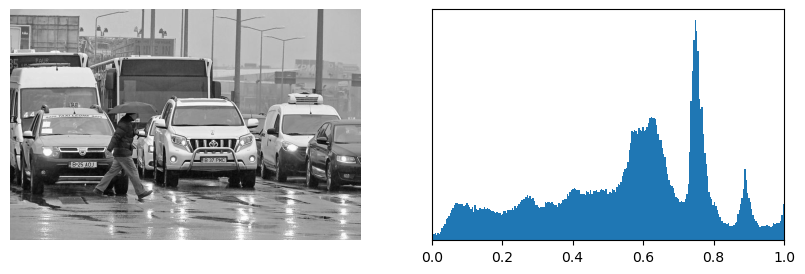

In [4]:
# Read cars image, convert to float32
# Run print_imginfo() and show_imghist()
I1 = io.imread("../cars.jpg", as_gray=True)
I1 = img_as_float(I1)
print_imginfo(I1)
show_imghist(I1)

In [5]:
def box_kernel(N):
    # All coefficients equal 1 for NxN array
    # Normalize kernel by dividing sum of coefficients of array
    h = np.ones((N, N))
    h /= h.sum()
    return h

    
def disk_kernel(N):
    # Center coefficient equals 1
    # Off-center coefficients equal inverse distance to center
    # Normalize kernel 
    n = int((N - 1) / 2)
    x, y = np.ogrid[-n:n+1, -n:n+1]
    disk = x**2 + y**2 <= n**2
    dist = np.sqrt(x**2 + y**2)
    dist[dist == 0] = 1
    h = 1 / dist
    h[~disk] = 0
    return h / np.sum(h)


<class 'numpy.ndarray'>
(480, 728) float32
Data range: 0.040566027 to 0.9868304
<class 'numpy.ndarray'>
(480, 728) float32
Data range: -0.7471196 to 0.7781012
<class 'numpy.ndarray'>
(480, 728) float32
Data range: 0.04362828 to 0.9448359
<class 'numpy.ndarray'>
(480, 728) float32
Data range: -0.85718924 to 0.7861893


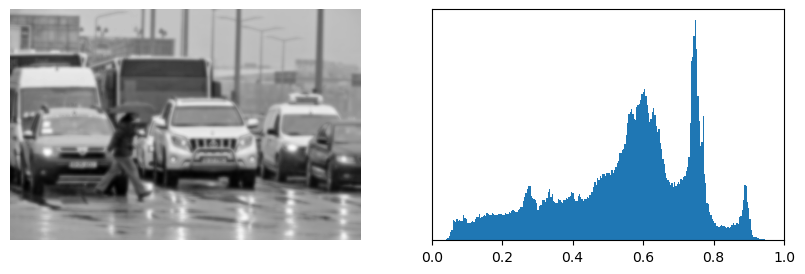

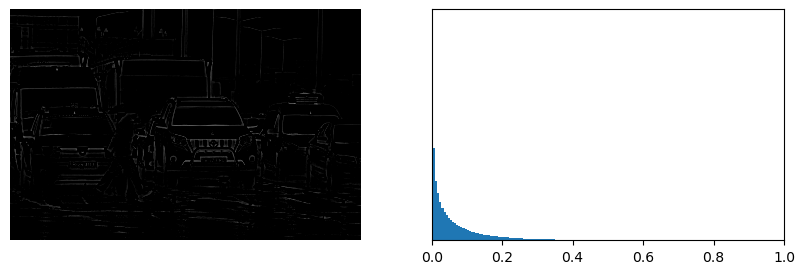

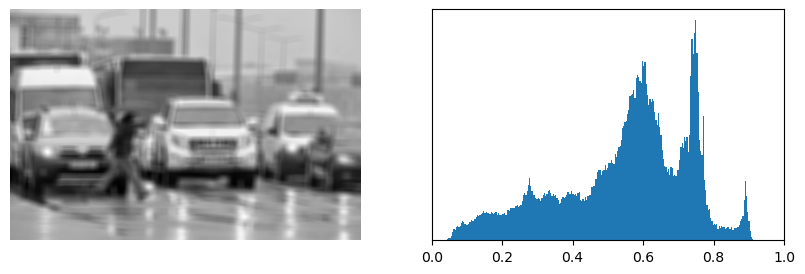

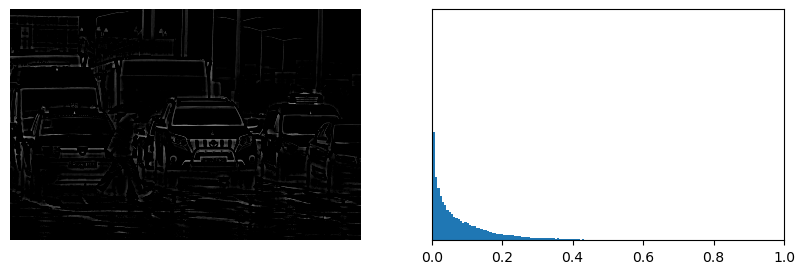

In [6]:
# Apply box_kernel(N) and disk_kernel(N) to loaded image using scipy.ndimage.convolve().
# Ultimately, use N=15 but try smaller and larger values as well to see effects thereof.
# Run print_imginfo() and show_imghist() on blurred image, say Iblur. Repeat for difference
# wrt original image, i.e., Iblur-I. Use appropriate (vmin,max) values.

#summary the box kernel blurs more. they look similar but the box is harder to distinguish. for the Iblur- I
#the box kernel is easier to see than the disc kernel. This makes sense as you would expect the difference to give
#an oppisite result

h1 = box_kernel(15)
Iblur_box = convolve(I1, h1)
h2 = disk_kernel(15)
Iblur_disk = convolve(I1, h2)

#disk kernel
print_imginfo(Iblur_disk)
show_imghist(Iblur_disk, np.min(Iblur_disk), np.max(Iblur_disk))

#disk kernel - image
print_imginfo(Iblur_disk-I1)
show_imghist(Iblur_disk-I1, np.min(Iblur_disk), np.max(Iblur_disk))

#box kernel
print_imginfo(Iblur_box)
show_imghist(Iblur_box, np.min(Iblur_box), np.max(Iblur_box))

#box kernel - image
print_imginfo(Iblur_box-I1)
show_imghist(Iblur_box-I1, np.min(Iblur_box), np.max(Iblur_box))





